## Lab - 3 - Prediction of band structure  

Total points - 10 points

We discussed about curve fitting using scipy in the last lab. In this lab, we will explore another package called PyLab to perform curve fitting. If you are more comfortable with scipy, feel free to finish this lab using scipy

Packages 


Pandas

PyLab

Scipy




This part of the lab focuses on curve-fitting methods on scienific data. Curve fitting methods are routinely applied on scientific data to verify the tends as expected from the physical laws. They can also help in deciding the model complexity by comparing performance of various polynomials. Under the hood, linear regression algorithms are working to provide coefficients of these polynomials.

That being said, let's fit curves of various degrees to the data corresponding to band structure of MoS2. The band structure of MoS2 is obtained using DFT studies and is shown below



The data has been obtained from the following link. https://medium.com/towards-artificial-intelligence/linear-regression-analysis-in-materials-sciences-a45caac70d70

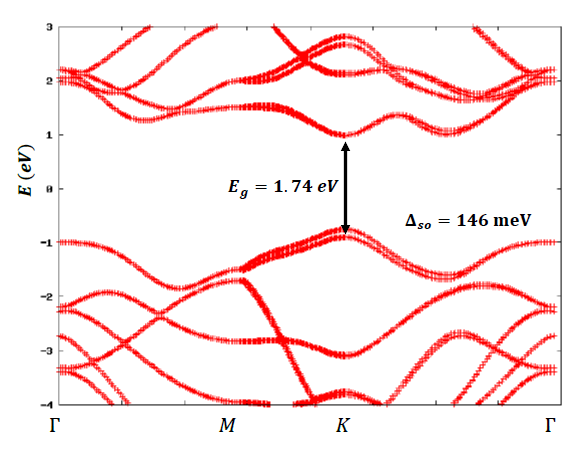

In [5]:
from IPython.display import Image
Image(filename='MoS2BandGap.png') 

You are provided with a csv file with first column as k-values and second column as corresponding conduction band energy as predicted by Density Functional Theory. Your task is to fit three curves of degree a.) 1 (linear) b.) 2 (quadratic) c.) 10 to k versus energy values and compute various statistical measures of accuracy. The cells below will walk you through these tasks.

In [15]:
# Import libraries
import pandas as pd
import numpy as np

%matplotlib inline

#pylab is used to fit a curve to the data.
import pylab


In [5]:
#Ques 1.a (1 point)

#Read the data from the file 'c_band.csv' as pandas dataframe and store it in varaible data

data = pd.read_csv('c_band.csv') #Enter code to read the csv file

In [9]:
#Ques 1.b (2 points)

#Display the first 10 rows of the dataframe. Hint - you might want to google pandas head function
data = data.rename(columns= {'x':'K', 'y':'Energy'}) # rename so it makes more sense for me

data.head(n = 10)

,K,Energy
0,1.5774,1.98832
1,1.5707,1.98968
2,1.5640,1.98832
3,1.5574,1.98424
4,1.5507,1.97744
5,1.5440,1.97064
6,1.5374,1.96112
7,1.5307,1.95024
8,1.5240,1.93800
9,1.5174,1.92576


In [10]:
# We would want to fit these curves at values close to minimum of conduction band. 

#Ques 1.c (1 point)

#From your dataframe, select the rows with k values in the range 0.82 - 1.

data = data[(data.K <1) & (data.K > 0.82)]
data.head(n =10)

,K,Energy
87,0.9974,1.16960
88,0.9907,1.14512
89,0.9840,1.12336
90,0.9774,1.10024
91,0.9707,1.07984
92,0.9640,1.05944
93,0.9574,1.04176
94,0.9507,1.02544
95,0.9440,1.01048
96,0.9374,0.99824


In [113]:
# Now that we have obtained our required dataframe, lets fit a linear curve to this data
xVal = data.K
yVal = data.Energy


#Ques 1.d (1 point)

# Use pylab's polyfit function to fit a curve of degree 1 and store it as model.


# Define and fit model
#------------------------------
lin_reg = np.polyfit(xVal, yVal, 1)

print(str(lin_reg[1]) + " is the B_0 parameter")  # the last entry on the list is the constant parameter
print(str(lin_reg[0]) + ' is the B_1 paremeter')

1.2100195397821658 is the B_0 parameter
-0.17941091363509193 is the B_1 paremeter


In [114]:
# Ques 1.e (1 point)
# Use the above model to predict the energy values and store as estY
#Hint - you may find polyval function useful here

estY = lin_reg[1] + lin_reg[0]*xVal


R-Squared value for linear model is  0.022108283080835345


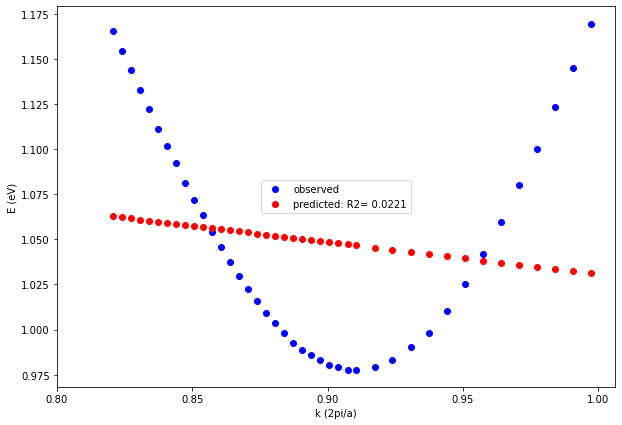

In [115]:
# Now that we have estY, let's see how accurate these predictions are.
# there are number of statistical accuracy measures that researchers use. Some of them are 
# R-Squared values, Mean absolute error, Mean squared error, etc. We will use R-Squared values but do check-out 
# other accuracy measures as well 

# The idea behind r-squared values is to compute how much sum of the squared deviations is different from the deviations from mean
# The formula to compute r-squared is 
R2 = 1 - ((yVal-estY)**2).sum()/((yVal-yVal.mean())**2).sum()
print("R-Squared value for linear model is ",R2)


# The following code plots the actual data (in blue) versus model prediction (in red)
pylab.figure(figsize=(10,7))
pylab.scatter(xVal,yVal, c='b', label='observed')
pylab.scatter(xVal,estY, c='r', label='predicted:' + ' R2' '='+ ' ' + str(round(R2,4)))
pylab.xlabel('k (2pi/a)')
pylab.ylabel('E (eV)')
pylab.xticks(pylab.arange(0.8, 1.05, 0.05))
pylab.legend(loc=10)
pylab.show()

As you can see a linear relation is unable to explains the underlying pattern and has very low R2 value. In the following cells, you will fit curves with higher degrees and report the corresponding R2.

R-Squared value for linear model is  0.9957370012641741


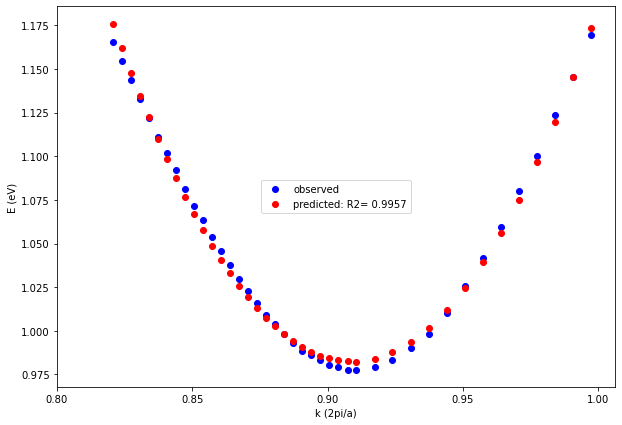

In [118]:
# Ques 1.f (2 points)

# Use scipy/pylab to fit a curve of degree 2, get the predictions.
# Copy the code in the above cell to compute R2 and plot predictions

# Define data
#------------------------------
xVal_degree2 = data.K
yVal_degree2 = data.Energy


# Define and fit model
#------------------------------
quadratic_model = np.polyfit(xVal_degree2, yVal_degree2, 2)
quadratic_model

# Estimate Y values
#------------------------
estY_quad = quadratic_model[2] + quadratic_model[1]*xVal_degree2 + quadratic_model[0]*(xVal_degree2**2)

#Calculate R^2
#----------------------------
R2 = 1 - ((yVal-estY_quad)**2).sum()/((yVal_degree2-yVal_degree2.mean())**2).sum()
print("R-Squared value for linear model is ",R2)

# The following code plots the actual data (in blue) versus model prediction (in red)
pylab.figure(figsize=(10,7))
pylab.scatter(xVal_degree2,yVal_degree2, c='b', label='observed')
pylab.scatter(xVal_degree2,estY_quad, c='r', label='predicted:' + ' R2' '='+ ' ' + str(round(R2,4)))
pylab.xlabel('k (2pi/a)')
pylab.ylabel('E (eV)')
pylab.xticks(pylab.arange(0.8, 1.05, 0.05))
pylab.legend(loc=10)
pylab.show()

C:\Users\Ian Johnston\Anaconda3\envs\MSE1065\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


R-Squared value for linear model is  0.999968182656431


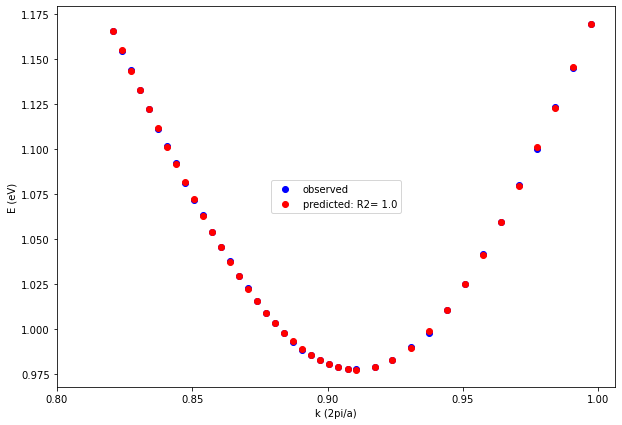

In [125]:
# Ques 1.f (2 points)

# Use scipy/pylab to fit a curve of degree 10, get the predictions.
# Copy the code in the above cell to compute R2 and plot predictions

# Define data
#------------------------------
xVal_degree10 = data.K
yVal_degree10 = data.Energy


# Define and fit model
#------------------------------
degree_10_model = np.polyfit(xVal_degree2, yVal_degree2, 10)
degree_10_model

# Estimate Y values
#------------------------
estY_10 = degree_10_model[10] \
        + degree_10_model[9]*xVal_degree2\
        + degree_10_model[8]*(xVal_degree2**2)\
+ degree_10_model[7]*(xVal_degree2**3)\
+ degree_10_model[6]*(xVal_degree2**4)\
+ degree_10_model[5]*(xVal_degree2**5)\
+ degree_10_model[4]*(xVal_degree2**6)\
+ degree_10_model[3]*(xVal_degree2**7)\
+ degree_10_model[2]*(xVal_degree2**8)\
+ degree_10_model[1]*(xVal_degree2**9)\
+ degree_10_model[0]*(xVal_degree2**10)\

#Calculate R^2
#----------------------------
R2 = 1 - ((yVal_degree10-estY_10)**2).sum()/((yVal_degree10-yVal_degree10.mean())**2).sum()
print("R-Squared value for linear model is ",R2)

# The following code plots the actual data (in blue) versus model prediction (in red)
pylab.figure(figsize=(10,7))
pylab.scatter(xVal_degree10,yVal_degree10, c='b', label='observed')
pylab.scatter(xVal_degree10,estY_10, c='r', label='predicted:' + ' R2' '='+ ' ' + str(round(R2,4)))
pylab.xlabel('k (2pi/a)')
pylab.ylabel('E (eV)')
pylab.xticks(pylab.arange(0.8, 1.05, 0.05))
pylab.legend(loc=10)
pylab.show()

### Key Points

1. Complex model might fit your data well but hard to generalize
2. Find out different measures of accuracy and how to compute them. 